In [1]:
__nbid__ = '0025'
__author__  = 'Alice Jacques <alice.jacques@noirlab.edu>, Robert Nikutta <robert.nikutta@noirlab.edu>, David Herrera <david.herrera@noirlab.edu>'
__version__ = '20251205' # aaaammdd; marca de fecha de la versión de este notebook
__datasets__ = ['vhs_dr5', 'gaia_dr3']  
__keywords__ = ['stars','proper motions','crossmatch','SMC','LMC']

# Explorando poblaciones estelares alrededor de las Nubes de Magallanes con VHS DR5
*por Alice Jacques y Robert Nikutta*

#### (_Traducción de [ExploringStellarPopulationsAroundMCsWithVHSDR5.ipynb](https://github.com/astro-datalab/notebooks-latest/blob/master/03_ScienceExamples/MagellanicClouds/ExploringStellarPopulationsAroundMCsWithVHSDR5.ipynb)_)

### Tabla de contenido
* [Objetivos y resumen del notebook](#goals)
* [Avisos Legales y atribuciones](#attribution)
* [Importaciones y configuración](#import)
* [Autenticación](#auth)
* [Selección de poblaciones estelares jóvenes y viejas alrededor de LMC y SMC](#selection)
* [Identificar puntos solo en la región Y u O, luego consultar los datos correspondientes](#identify)
* [Movimientos propios estelares](#pm)
* [Graficar los mapas de morfología de densidad espacial](#spatmorph)
* [Usando Gaia DR3 en lugar de Gaia DR2](#gaiadr2)
* [Recursos y referencias](#resources)

<a class="anchor" id="goals"></a>
# Objetivos
Para reproducir las Figuras 3, 4 y 10 de [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054) "Stellar substructures in the periphery of the Magellanic Clouds with the VISTA Hemisphere Survey from the red clump and other tracers" (_Subestructuras estelares en la periferia de las Nubes de Magallanes con el VISTA Hemisphere Survey del grupo rojo y otros graficadores_). Estas figuras se centran en detallar las características morfológicas en las afueras de las Nubes de Magallanes. En particular, este notebook ayudará a confirmar las subestructuras señaladas en la Figura 10 del artículo.

# Resumen
En su artículo, El Youssoufi et al. presentan un análisis detallado de la distribución espacial de diferentes poblaciones estelares en la periferia de las Nubes de Magallanes (MC) utilizando datos del VISTA Hemisphere Survey ([VHS; McMahon et al. 2013](https://ui.adsabs.harvard.edu/abs/2013Msngr.154...35M/abstract)). Para comprender las formas en que los MC interactúan entre sí, es muy importante examinar las subestructuras estelares que rodean a los MC. Podemos utilizar los datos de el survey VHS para verificar la existencia de subestructuras conocidas y descubrir otras nuevas estudiando la morfología que rodea a los MC en un área continua.

NOTA: El artículo también utiliza datos de el survey YJK de infrarrojo cercano de VISTA del sistema MC ([VMC; Cioni et al. 2011](https://ui.adsabs.harvard.edu/abs/2011A%26A...527A.116C/abstract)), que no usaremos en este notebook.

<a class="anchor" id="attribution"></a>
# Avisos Legales y atribuciones

Avisos Legales
-----------
Tome en cuenta que usar el Astro Data Lab constituye un acuerdo con nuestros [Avisos Legales](https://datalab.noirlab.edu/disclaimers.php) mínimos.

Reconocimientos
---------------
Si ud. usa el **Astro Data Lab** en sus publicaciones de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios de datos proveeidos por el Astro Data Lab, el cual es parte del Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) del NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc."(Asociación de Universidaddes para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

Si utiliza **SPARCL junto con la plataforma de Astro Data Lab** (por medio de JupyterLab, línea de comando o interfaz de la web) en su publicación de investigación, por favor incluya el siguiente texto en la sección de Reconocimientos de su publicaciones:

_Esta investigación utiliza servicios o datos proporcionados por el "SPectra Analysis and Retrievable Catalog Lab" (SPARCL) (Laboratorio de Análisis y Catálogo Recuperable de Espectros) y el Astro Data Lab, ambos pertenecientes al Programa "Community Science and Data Center" (CSDC) (Centro de Ciencia Comunitaria y Datos) de NSF NOIRLab. NOIRLab es operado por la "Association of Universities for Research in Astronomy (AURA), Inc." (Asociación de Universidades para la Investigación en Astronomía, Inc.), bajo un acuerdo de cooperación con la "U.S. National Science Foundation" (Fundación Nacional de Ciencia de los EE. UU.)._

En cualquiera de los casos, **por favor cite las siguientes publicaciones**:

* Publicación del concepto de Data Lab: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Descripción general del Astro Data Lab: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411.

Si hace referencia al Jupyterlab / Jupyter notebooks de Data Lab, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097.

Si publica en una revista de la AAS, agregue también la palabra clave `\facility{Astro Data Lab}`

Y si está usando SPARCL, por vor agregue también `\software{SPARCL}` y cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576.

La biblioteca de NOIRLab mantiene [listas de reconocimientos apropiados](https://noirlab.edu/science/about/scientific-acknowledgments) para usar cuando se hacen publicaciones utilizando los recursos, servicios o datos del Laboratorio.

---- **Versión en Inglés** ----


# Disclaimer & attribution

Disclaimers
-----------
Note that using the Astro Data Lab constitutes your agreement with our minimal [Disclaimers](https://datalab.noirlab.edu/disclaimers.php).

Acknowledgments
---------------
If you use **Astro Data Lab** in your published research, please include the text in your paper's Acknowledgments section:

_This research uses services or data provided by the Astro Data Lab, which is part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

If you use **SPARCL jointly with the Astro Data Lab platform** (via JupyterLab, command-line, or web interface) in your published research, please include this text below in your paper's Acknowledgments section:

_This research uses services or data provided by the SPectra Analysis and Retrievable Catalog Lab (SPARCL) and the Astro Data Lab, which are both part of the Community Science and Data Center (CSDC) Program of NSF NOIRLab. NOIRLab is operated by the Association of Universities for Research in Astronomy (AURA), Inc. under a cooperative agreement with the U.S. National Science Foundation._

In either case **please cite the following papers**:

* Data Lab concept paper: Fitzpatrick et al., "The NOAO Data Laboratory: a conceptual overview", SPIE, 9149, 2014, https://doi.org/10.1117/12.2057445

* Astro Data Lab overview: Nikutta et al., "Data Lab - A Community Science Platform", Astronomy and Computing, 33, 2020, https://doi.org/10.1016/j.ascom.2020.100411

If you are referring to the Data Lab JupyterLab / Jupyter Notebooks, cite:

* Juneau et al., "Jupyter-Enabled Astrophysical Analysis Using Data-Proximate Computing Platforms", CiSE, 23, 15, 2021, https://doi.org/10.1109/MCSE.2021.3057097

If publishing in a AAS journal, also add the keyword: `\facility{Astro Data Lab}`

And if you are using SPARCL, please also add `\software{SPARCL}` and cite:

* Juneau et al., "SPARCL: SPectra Analysis and Retrievable Catalog Lab", Conference Proceedings for ADASS XXXIII, 2024
https://doi.org/10.48550/arXiv.2401.05576

The NOIRLab Library maintains [lists of proper acknowledgments](https://noirlab.edu/science/about/scientific-acknowledgments) to use when publishing papers using the Lab's facilities, data, or services.


<a class="anchor" id="import"></a>
# Importaciones y configuración

In [1]:
# Importaciones de terceros
import numpy as np
import pylab as plt
%matplotlib inline
from matplotlib.patches import Ellipse
from matplotlib.colors import LogNorm
from shapely.geometry import Polygon, Point
import pandas as pd

# Importaciones de DataLab
from dl import queryClient as qc

# Configuración predeterminada de gráficos
plt.rcParams['font.size'] = 14

<a class="anchor" id="auth"></a>
# Autenticación
Se puede acceder a gran parte de la funcionalidad de Data Lab sin iniciar sesión explícitamente (el servicio utiliza un inicio de sesión anónimo). Sin embargo, algunas funciones, como guardar los resultados de las consultas en el espacio de almacenamiento virtual, requieren iniciar sesión (es decir, necesitará una cuenta de usuario registrada).

Si necesita iniciar sesión en Data Lab, descomente la celda a continuación y ejecútela:

In [ ]:
#from getpass import getpass
#token = ac.login(input("Ingrese su nombre de usuario: (+ENTER) "),getpass("Ingrese su contraseña:: (+ENTER) "))
#ac.whoAmI()

<a class="anchor" id="selection"></a>
## Selección de poblaciones estelares jóvenes y viejas alrededor de LMC y SMC
Primero definimos las regiones poligonales que separan dos clases diferentes de objetos: estrellas jóvenes (región Y) y estrellas viejas (región O). Las coordenadas del vértice del polígono enumeradas aquí fueron establecidas por primera vez por [Cioni et al. (2014)](https://arxiv.org/pdf/1306.4336.pdf) y [Cioni et al. (2016)](https://arxiv.org/pdf/1510.07647.pdf), luego refinado en la Sección 2.1 de [El Youssoufi et al. (2019)](https://arxiv.org/pdf/1908.08545.pdf), y luego se refinó más en la Sección 2.2 de su [artículo de 2021](https://arxiv.org/abs/2104.08054). Las coordenadas de los vértices del polígono están en el diagrama de magnitud de color J-Ks/Ks.

In [2]:
# Definir regiones poligonales
polygon_Y = Polygon([(-0.6, 18.8), (0.2, 18.8), (0.4,17.5), (0.18,17), (0,16.5), (0,16), (0.4,16), (0.4,16.5), (0.5,16), (1,10), (-0.6,10)])
polygon_O = Polygon([(0.2,18.8), (0.6,18.8), (0.6,16), (1.2,12), (2.5,12), (2.5,10), (1,10), (0.5,16), (0.4, 16.5), (0.4,17.5)])

Aquí escribimos la consulta para extraer la magnitud Ks y el color J-Ks de la tabla VHS DR5 vhs_cat_v3 para puntos que están cerca de LMC y SMC. Comparamos el gráfico resultante con el gráfico más a la izquierda en la Figura 3 de [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054).

In [3]:
query = """
SELECT 
    jmkspnt,ksapermag3 
FROM
    vhs_dr5.vhs_cat_v3
WHERE
    jmkspnt!='NaN' AND ksapermag3 !='NaN' AND japermag3 !='NaN'
    AND (dec2000<=-49.73 AND dec2000>-99.73)
    AND ((ra2000<=130 AND ra2000>0) OR (ra2000<=360 AND ra2000>340))
"""
print(query)


SELECT 
    jmkspnt,ksapermag3 
FROM
    vhs_dr5.vhs_cat_v3
WHERE
    jmkspnt!='NaN' AND ksapermag3 !='NaN' AND japermag3 !='NaN'
    AND (dec2000<=-49.73 AND dec2000>-99.73)
    AND ((ra2000<=130 AND ra2000>0) OR (ra2000<=360 AND ra2000>340))



In [4]:
res = qc.query(sql=query, timeout=600, fmt='pandas')

Definimos una pequeña función auxiliar para facilitar el cálculo de histogramas 2D.

In [5]:
def compute_nbins(x,y,binsize,extent=None):
    """Calcule el número necesario de intervalos x e y.
    
    A partir de los datos x e y, y el tamaño deseado del intervalo (idéntico para x e y),
    calcula el número de intervalos x e y necesarios. Si se proporciona 'extensión', recorte
    datos xey hasta los límites indicados en 'extensión' primero. De lo contrario, utilice el
    rango de datos completo.
    
    Parámetros:
    -----------
    n, x: matrices 1D
      Los datos xey para agrupar en 2D.
      
    binsize: flotante
      El tamaño de intervalo deseado (idéntico para x e y), en las unidades de x e y.
      
    extent: tupla
      Opcional. Si no es Ninguno, es una tupla de 4 (xmin,xmax,ymin,ymax).
      
    Devoluciones:
    --------
    x, y: matrices 1D
      Si extensión = Ninguna, las xey devueltas son idénticas a las xey de entrada.
      De lo contrario, se recortan a los rangos [xmin,xmax] y [ymin,ymax]
      definido en 'extensión'.
    """
    
    if extent is not None:
        xmin, xmax, ymin, ymax = extent
        select = (x >= xmin) & (x <= xmax) & (y >= ymin) & (y <= ymax)
        x = x[select]
        y = y[select]
    else:
        xmin, xmax, ymin, ymax = x.min(), x.max(), y.min(), y.max()
        
    nxbins = int((xmax-xmin)/binsize)
    nybins = int((ymax-ymin)/binsize)

    return x, y, nxbins, nybins

Y definimos una función de graficado para simplificar el graficado de diagramas de color-magnitud:

In [6]:
def plot_cmd(x,y,title,extent=None,binsize=0.02):
    """Trazar un diagrama color-magnitud a partir de secuencias de color (x) y magnitud (y)."""

    # obtener el número de intervalos en x e y, dado un tamaño de intervalo objetivo
    # (intervalos de magnitud para un CMD)
    x, y, nxbins, nybins = compute_nbins(x,y,binsize,extent)

    # trazar histograma 2D
    fig, ax = plt.subplots(1,1,figsize=(10,8))
    hmap,xedges,yedges,im = ax.hist2d(x, y, (nxbins, nybins), norm=LogNorm(), cmap=plt.cm.jet)
    ax.set_title(title)
    ax.set_xlabel('J-Ks (mag)')
    ax.set_ylabel('Ks (mag)')
    ax.invert_yaxis()

    # trazar polígonos
    ax.plot(*polygon_Y.exterior.xy, 'k-', lw=3)
    ax.plot(*polygon_O.exterior.xy, 'k-', lw=3)

    # etiquetar polígonos
    ax.text(-0.5,10.8,'Y',fontsize=30)
    ax.text(2.2,10.8,'O',fontsize=30)

    plt.colorbar(im,label="objetos por intervalo de magnitud (%g x %g mag)" % (binsize,binsize))

Ahora podemos graficar el DCM previo a la comparación cruzada:

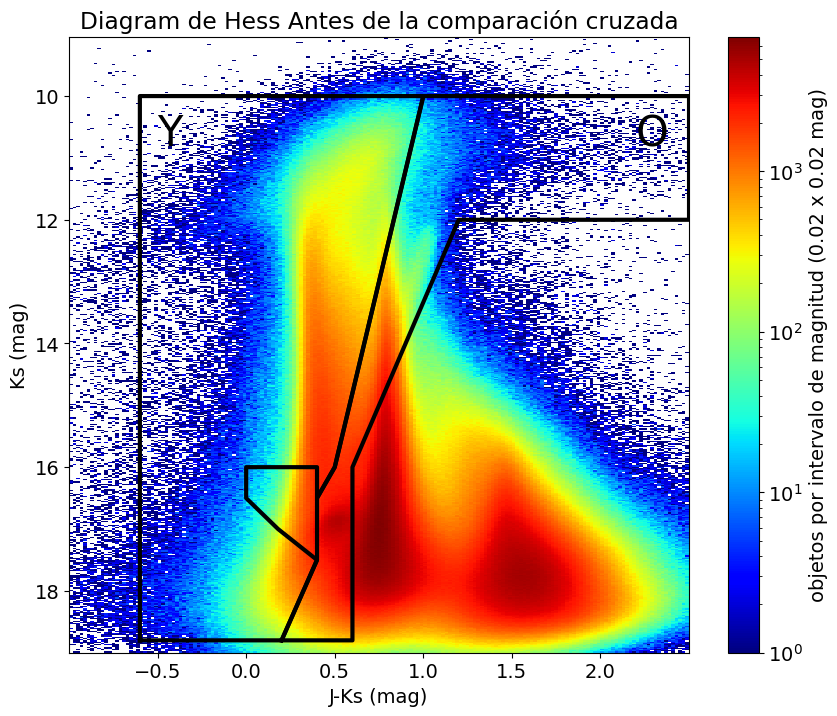

In [7]:
plot_cmd(res['jmkspnt'],res['ksapermag3'],'Diagram de Hess Antes de la comparación cruzada',extent=(-1,2.5,9,19),binsize=0.02)

Compare este gráfico con la Figura 3 (panel izquierdo) en [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054). La escala de colores indica la densidad estelar en escala logarítmica. Las estrellas dentro del área poligonal pequeña (16 ≤ Ks ≤ 17,5 mag) no se incluyen en el estudio porque tienen edades mixtas. Encerradas por líneas negras continuas hay dos clases diferentes de objetos: Y se refiere a estrellas jóvenes y O se refiere a estrellas viejas. Las regiones Y y O resultan de la combinación de regiones del DCM establecida por [El Youssoufi et al. (2019)](https://arxiv.org/abs/1908.08545).

**Región Y:**
- Poblada por estrellas jóvenes, incluidas las superiores de la secuencia principal y estrellas supergigantes.
- Contiene las regiones A, B, C, I, G y H de [El Youssoufi et al. (2019)](https://arxiv.org/abs/1908.08545).

**Región O:**
- Poblada por estrellas antiguas, incluidas la rama gigante roja, la rama gigante asintótica y estrellas RC.
- Contiene las regiones D, E, J, K y M de [El Youssoufi et al. (2019)](https://arxiv.org/abs/1908.08545).

**Ambas regiones Y y O:**
- Limitado a Ks = 18,8 mag en lugar de Ks = 19,8 mag, para reflejar la sensibilidad de las observaciones VHS.
- Se ha ampliado a Ks = 10 mag, en lugar de Ks = 11,98 mag y a J-Ks = -0,6 mag en lugar de J-Ks = -0,2 mag, para maximizar el número de estrellas después de su comparación cruzada con Gaia DR3 (ver siguiente gráfico).

## Consulta con restricciones
Ahora consultamos VHS DR5, Gaia DR3 y la tabla de coincidencias cruzadas precalculada entre VHS DR5 y Gaia DR3 para extraer las magnitudes, el paralaje y los valores de movimiento propio con las siguientes restricciones:
- Las magnitudes existen
- Existen movimientos propios
- Los paralajes son <=0,2 mas.
- Los objetos son únicos (priorsec<=0 o priorsec=framesetid)
- Clasificadas como estrellas con al menos un 70% de probabilidad (bandera mergedclass = −1 o mergedclass = −2)
- Los errores fotométricos son inferiores a 0,2 mag.
- AR está entre 0 y 130 o entre 340 y 360
- Dec está entre -119,73 y -39,73

In [8]:
query_xmatch = """
SELECT 
    X.ra1 AS ra_vhs, X.dec1 AS dec_vhs,
    (V.jmkspnt - 0.011) AS jmkspnt, (V.ksapermag3 + 0.011) AS ksapermag3, 
    G.parallax, G.pmra, G.pmdec
FROM
    vhs_dr5.x1p5__vhs_cat_v3__gaia_dr3__gaia_source AS X 
JOIN
    gaia_dr3.gaia_source AS G ON X.id2 = G.source_id
JOIN
    vhs_dr5.vhs_cat_v3 AS V ON X.id1 = V.sourceid
WHERE
    jmkspnt!='NaN' AND ksapermag3 !='NaN' AND japermag3 !='NaN'
    AND parallax<=0.2
    AND (priorsec<=0 OR priorsec = framesetid)
    AND (mergedclass=-1 OR mergedclass=-2)
    AND ksapermag3err<0.2 AND japermag3err<0.2
    AND pmra !='NaN' AND pmdec !='NaN'
    AND pmra BETWEEN -2.25 AND 4.5
    AND pmdec BETWEEN -2.25 AND 2.25
    AND dec1 BETWEEN -119.73 AND -39.73
    AND ((ra1 BETWEEN 0 AND 130) OR (ra1 BETWEEN 340 and 360))
"""

print(query_xmatch) # imprimir la declaración de consulta en pantalla


SELECT 
    X.ra1 AS ra_vhs, X.dec1 AS dec_vhs,
    (V.jmkspnt - 0.011) AS jmkspnt, (V.ksapermag3 + 0.011) AS ksapermag3, 
    G.parallax, G.pmra, G.pmdec
FROM
    vhs_dr5.x1p5__vhs_cat_v3__gaia_dr3__gaia_source AS X 
JOIN
    gaia_dr3.gaia_source AS G ON X.id2 = G.source_id
JOIN
    vhs_dr5.vhs_cat_v3 AS V ON X.id1 = V.sourceid
WHERE
    jmkspnt!='NaN' AND ksapermag3 !='NaN' AND japermag3 !='NaN'
    AND parallax<=0.2
    AND (priorsec<=0 OR priorsec = framesetid)
    AND (mergedclass=-1 OR mergedclass=-2)
    AND ksapermag3err<0.2 AND japermag3err<0.2
    AND pmra !='NaN' AND pmdec !='NaN'
    AND pmra BETWEEN -2.25 AND 4.5
    AND pmdec BETWEEN -2.25 AND 2.25
    AND dec1 BETWEEN -119.73 AND -39.73
    AND ((ra1 BETWEEN 0 AND 130) OR (ra1 BETWEEN 340 and 360))



In [9]:
res_xmatch = qc.query(sql=query_xmatch,fmt='pandas',timeout=600)
res_xmatch

,ra_vhs,dec_vhs,jmkspnt,ksapermag3,parallax,pmra,pmdec
0,340.110370,-42.967672,0.348407,16.871744,0.082258,-0.092379,-1.975390
1,340.098781,-42.938750,0.683088,18.457476,-1.764426,0.698652,-1.021465
2,340.042872,-43.160891,0.713365,17.001383,-0.052066,3.004959,0.882302
3,340.586096,-43.176524,0.429256,18.708769,0.043303,1.203316,-0.830077
4,340.048862,-43.138814,1.232204,18.191775,-0.138429,0.613362,1.181704
...,...,...,...,...,...,...,...
1435509,40.990110,-39.778550,0.987460,15.948644,-0.130383,-0.016740,-0.065273
1435510,42.926752,-39.773407,1.259702,17.546362,-0.141713,0.151380,0.285484
1435511,42.843076,-39.772547,0.474300,16.734888,0.079613,2.682990,-2.021503
1435512,42.917184,-39.735326,0.930158,17.572483,0.117858,0.033043,-0.029930


Ahora podemos graficar el DCM nuevamente, esta vez después del cruce:

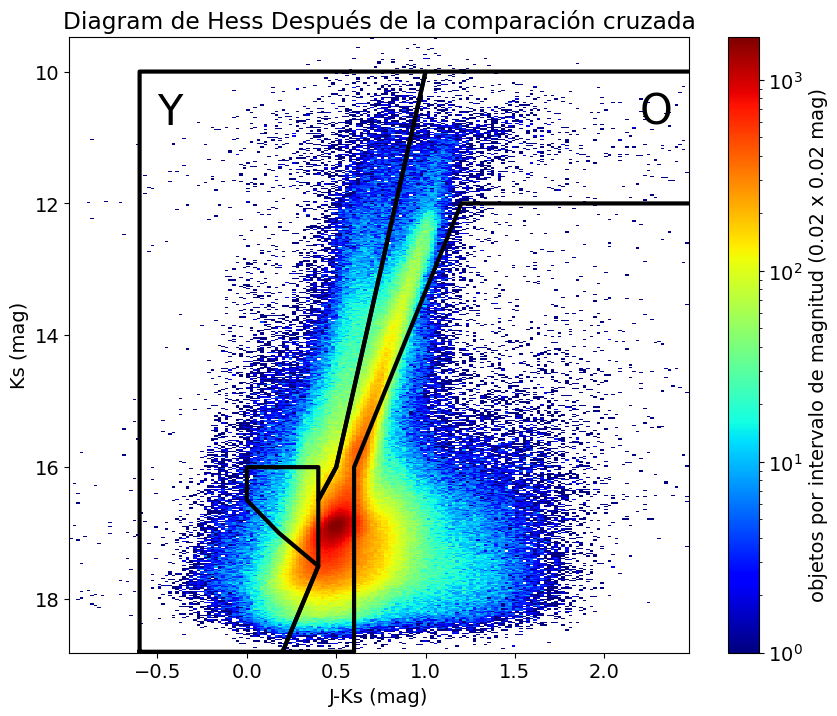

In [10]:
plot_cmd(res_xmatch['jmkspnt'],res_xmatch['ksapermag3'],'Diagram de Hess Después de la comparación cruzada',extent=(-1,2.5,9,19),binsize=0.02)

Compare este gráfico con la Figura 3 (panel central) en [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054).

<a class="anchor" id="identify"></a>
## Identificar puntos solo en la región Y u O y luego consultar los datos correspondientes
Ahora encontraremos puntos que se encuentren solo dentro de la región del polígono Y y solo dentro de la región del polígono O. Usaremos estos conjuntos de puntos para obtener datos de la tabla `res_xmatch` (AR, Dec, paralaje y movimientos propios). Definamos una función auxiliar:

In [11]:
def get_spatial_selection_mask(x, y, polygon):
    """Para obtener una lista de coordenadas xey, determine si están dentro del polígono.
    
    Parámetros
    ----------
    x, y : lista
       Listas de coordenadas xey
       
    polygon : instancia
       Instancia de Shapely.geometry.Polygon
       
    Devoluciones
    -------
    sel : matriz
       Matriz booleana 1D de la misma longitud que `x` e `y`.
       Para cada (x,y) dentro del polígono, "sel" es Verdadero y Falso en caso contrario.
    """
    
    sel = [True if polygon.contains(Point(xy)) else False for xy in zip(x,y)]

    return np.array(sel)  # devolver una matriz para permitir operaciones booleanas más adelante

A continuación, sel_Y y sel_O son matrices de selección booleanas 1D, con valores verdaderos para cada estrella que se encuentra dentro del polígono Y u O correspondiente.

In [12]:
xcol, ycol = 'jmkspnt', 'ksapermag3'  # nombres de columnas a usar
x = res_xmatch[xcol]  # los datos reales de estas columnas
y = res_xmatch[ycol]
sel_Y = get_spatial_selection_mask(x,y,polygon_Y)  # devuelve una matriz de selección booleana 1D
sel_O = get_spatial_selection_mask(x,y,polygon_O)

<a class="anchor" id="pm"></a>
## Movimientos propios estelares
Examinamos la densidad estelar de objetos pertenecientes a las regiones Y y O en el espacio de movimiento propio. Definimos dos elipses alrededor de las distribuciones LMC y SMC en el espacio de movimiento propio.

In [13]:
LMC_vertices = Ellipse((1.7,0.4),1,2.2,angle=15).get_verts()  # los argumentos son: (x0,y0), ancho x, ancho y, ángulo (en grados, en sentido antihorario)
LMC_ellipse = Polygon(LMC_vertices)  # Convertir en un polígono

SMC_vertices = Ellipse((0.9,-1.2),1.2,0.5).get_verts()
SMC_ellipse = Polygon(SMC_vertices)  # Convertir en un polígono

In [14]:
def plot_pm_diagram(x,y,extent=None,binsize=0.006):

    # Obtener el número de intervalos x e y, dado el tamaño de intervalo deseado
    x, y, nxbins, nybins = compute_nbins(x,y,binsize,extent)

    # Graficar
    fig, ax = plt.subplots(1,1,figsize=(14,8))
    hmap, xedges, yedges, im = plt.hist2d(x, y, (nxbins, nybins), cmap=plt.cm.jet, norm=LogNorm())
    plt.plot(*LMC_ellipse.exterior.xy,'w',lw=3)
    plt.plot(*SMC_ellipse.exterior.xy,'w',lw=3)
    ax.set_title('Distribuciones de Movimiento Propio Estelar')
    ax.set_xlabel('$\mu_{AR}$ (msa $año^{-1}$)')
    ax.set_ylabel('$\mu_{Dec}$ (msa $año^{-1}$)')
    ax.text(-2,-2,'Y + O',fontsize=30,color='k',family='serif')
    
    plt.colorbar(im,label=r"Objetos por intervalo (%g x %g $\rm mas\,\, yr^{-1}$)" % (binsize,binsize))

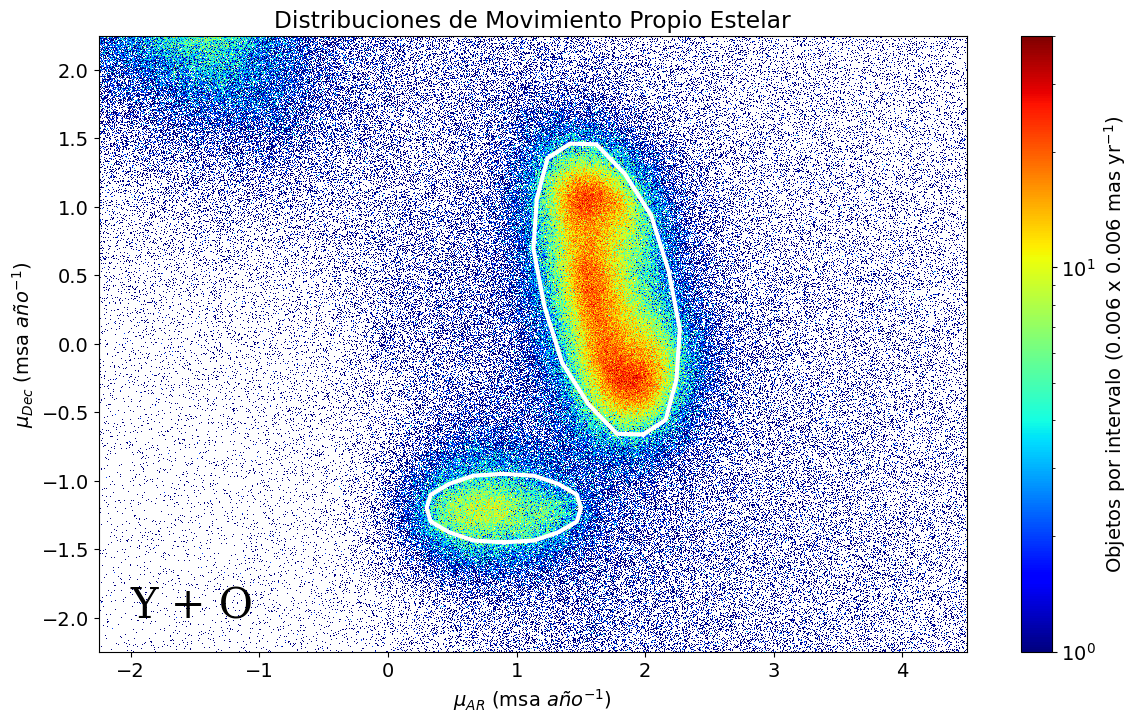

In [15]:
plot_pm_diagram(res_xmatch[sel_Y | sel_O]['pmra'],res_xmatch[sel_Y | sel_O]['pmdec'],binsize=0.006)

Compare este gráfico con la Figura 4 en [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054) (msa -> mili-segundos de arco). Muestra los movimientos propios estelares hacia la dirección de las MC. Dentro de la elipse grande y pequeña se encuentran la mayoría de los objetos con movimientos propios LMC y SMC, respectivamente. Muchos de los objetos que quedan fuera de estas elipses pertenecen a la Vía Láctea. Los objetos que pertenecen a estas dos elipses conforman nuestro conjunto de datos de morfología, que consta de más de 300.000 fuentes.

#### Ahora creamos máscaras de selección para objetos dentro de la elipse de movimiento propio de SMC o LMC, respectivamente:

In [16]:
sel_pm_SMC = get_spatial_selection_mask(res_xmatch['pmra'],res_xmatch['pmdec'],SMC_ellipse)
sel_pm_LMC = get_spatial_selection_mask(res_xmatch['pmra'],res_xmatch['pmdec'],LMC_ellipse)

<a class="anchor" id="spatmorph"></a>
## Mapas morfológicos de la densidad espacial de las estrellas Y, O e Y+O
A continuación, construiremos los mapas de morfología de densidad espacial de estrellas jóvenes, viejas y jóvenes+viejas utilizando selecciones de movimiento propio LMC, SMC y LMC o SMC.
Primero, se realiza la transformación de coordenadas de angulares a cartesianas mediante una proyección equidistante cenital con un origen de proyección de `ra0=81,24 grados` y `dec0=-69,73 grados` correspondiente al punto más denso en la barra LMC ([de Vaucouleurs & Freeman 1972](https://ui.adsabs.harvard.edu/abs/1972VA.....14..163D/abstract)).

In [17]:
def zenithal_equidistant_projection(ra,dec):
    """
    Realiza la transformación de coordenadas de angulares a cartesianas.
    a través de una proyección equidistante cenital dado un punto particular a ser
    el origen del análisis (ra0, dec0).
    """
    ra0 = 81.24 * (np.pi/180)   # convertir a radianes
    dec0 = -69.73 * (np.pi/180)
    ra = ra * (np.pi/180)
    dec = dec * (np.pi/180)
    
    c = np.arccos( (np.sin(dec0)*np.sin(dec)) + (np.cos(dec0)*np.cos(dec)*np.cos(ra-ra0)) )
    k = c/(np.sin(c))
    x = k * np.cos(dec) * np.sin(ra-ra0)
    y = k * ( (np.cos(dec0)*np.sin(dec)) - (np.sin(dec0)*np.cos(dec)*np.cos(ra-ra0)) )

    X = x * (180/np.pi)   # convertir de nuevo a grados
    Y = y * (180/np.pi)
    
    return X,Y

Calcular X e Y cartesiano y agregar columnas nuevas al marco de datos res_xmatch:

In [18]:
X,Y = zenithal_equidistant_projection(res_xmatch['ra_vhs'],res_xmatch['dec_vhs'])
res_xmatch['X'] = X
res_xmatch['Y'] = Y

#### Creando máscaras elípticas en el plano X,Y
Aquí definimos dos elipses que enmascararán la región central de LMC y SMC para mejorar la distribución de estrellas en las regiones exteriores. Sólo querremos conservar los puntos de la periferia (es decir, puntos que no están contenidos dentro de las elipses) para un análisis más detallado.

In [19]:
LMC_vertices = Ellipse((0,0.5),12,14).get_verts()  # ((x_center, y_center), ancho, alto)
LMC_mask = Polygon(LMC_vertices)  # Convertir en un polígono

SMC_vertices = Ellipse((-16,-13.5),7.5,7.5).get_verts()
SMC_mask = Polygon(SMC_vertices)

# crear máscaras de selección para puntos dentro de las elipses XY para LMC y SMC
sel_cart_LMC = get_spatial_selection_mask(res_xmatch['X'],res_xmatch['Y'],LMC_mask)
sel_cart_SMC = get_spatial_selection_mask(res_xmatch['X'],res_xmatch['Y'],SMC_mask)

Ahora podemos graficar las densidades espaciales de estrellas fuera de las elipses SMC y LMC, pero que tienen movimientos propios consistentes con las MC y que tienen colores y magnitudes dentro de los polígonos Y u O:

In [20]:
def plot_spatialdensity(x1,y1,x2,y2,x3,y3,mc):
    """
    Dadas las coordenadas xey (RA y Dec) de tres diferentes
    regiones y el nombre del MC (ya sea SMC o LMC, o vacío
    cadena), graficar tres mapas de morfología de densidad espacial.
    """

    # hacer figura
    fig, axs = plt.subplots(1, 3, figsize=(25,25), sharey=False, sharex=False)

    # graficar un panel
    def plotaxis(ax,x,y,bins=130,title=''):
        hist, xedges, yedges = np.histogram2d(x,y,bins=bins)
        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        r = ax.imshow(hist.T, extent=extent, origin='lower',
                      interpolation='spline16', cmap=plt.get_cmap('jet', 15), vmax=15,)
        
        ax.set_xlim(20,-30)
        ax.set_ylim(-24,20)
        ax.set_ylabel('$\Delta$ Dec (grados)')
        ax.set_xlabel('$\Delta$ AR (grados)')

        ax.text(0.97,0.9,title,transform=ax.transAxes,ha='right',fontsize=30,color='w',family='serif')
        ax.text(0.97,0.8,mc,transform=ax.transAxes,ha='right',fontsize=20,color='w',family='serif')
        
        cbar = fig.colorbar(r,ax=ax,shrink=0.21, label='Número de estrellas por intervalo')
        cbar.set_ticks([0, 3, 6, 9, 12, 15])

    # graficar todos los paneles
    plotaxis(axs[0],x1,y1,title='Y+O')
    plotaxis(axs[1],x2,y2,title='Y')
    plotaxis(axs[2],x3,y3,title='oh')
            
    plt.show()

#### Seleccionar miembros y trama:

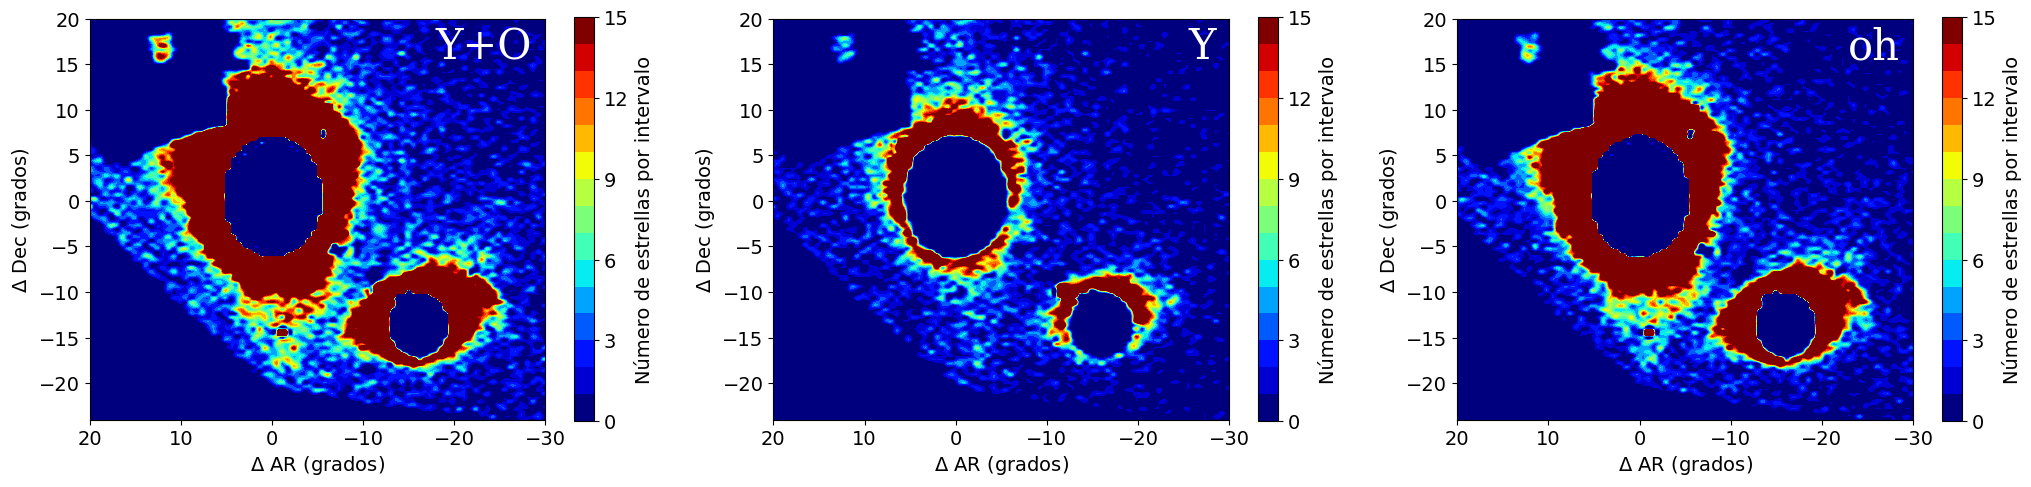

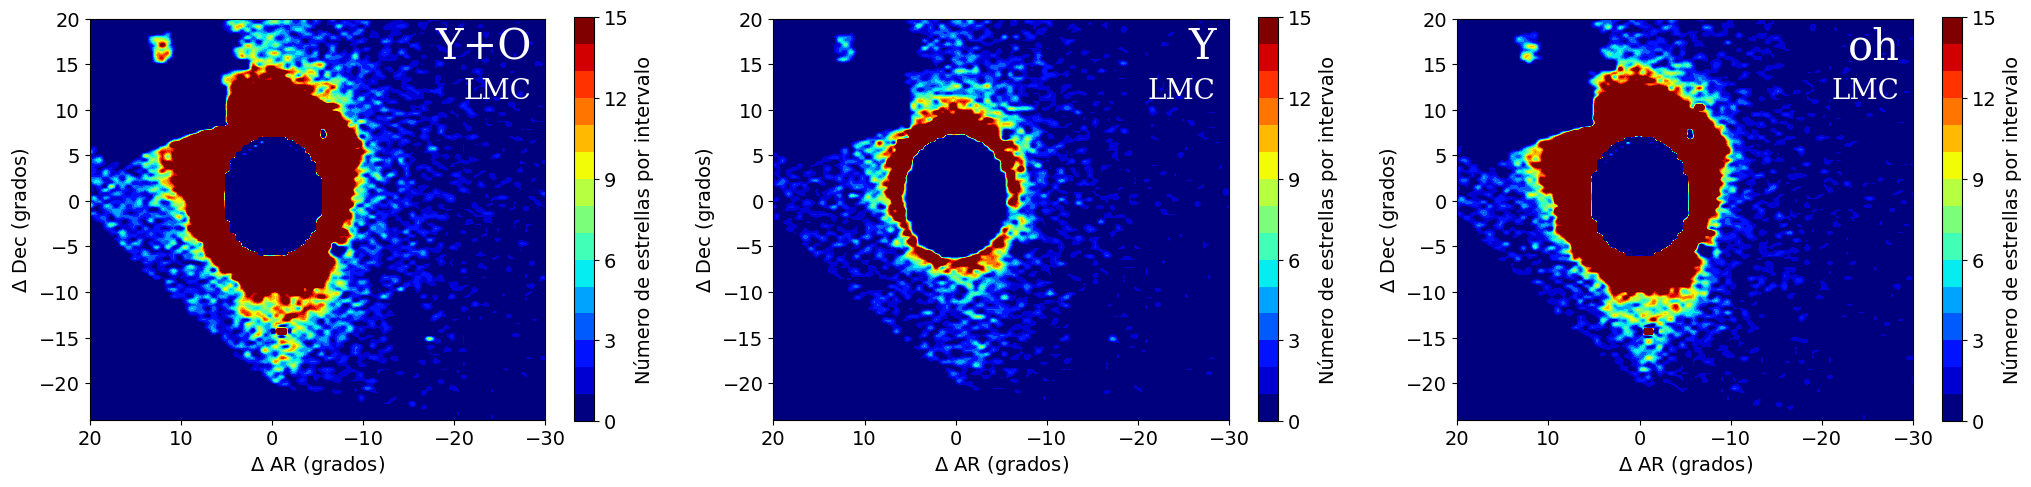

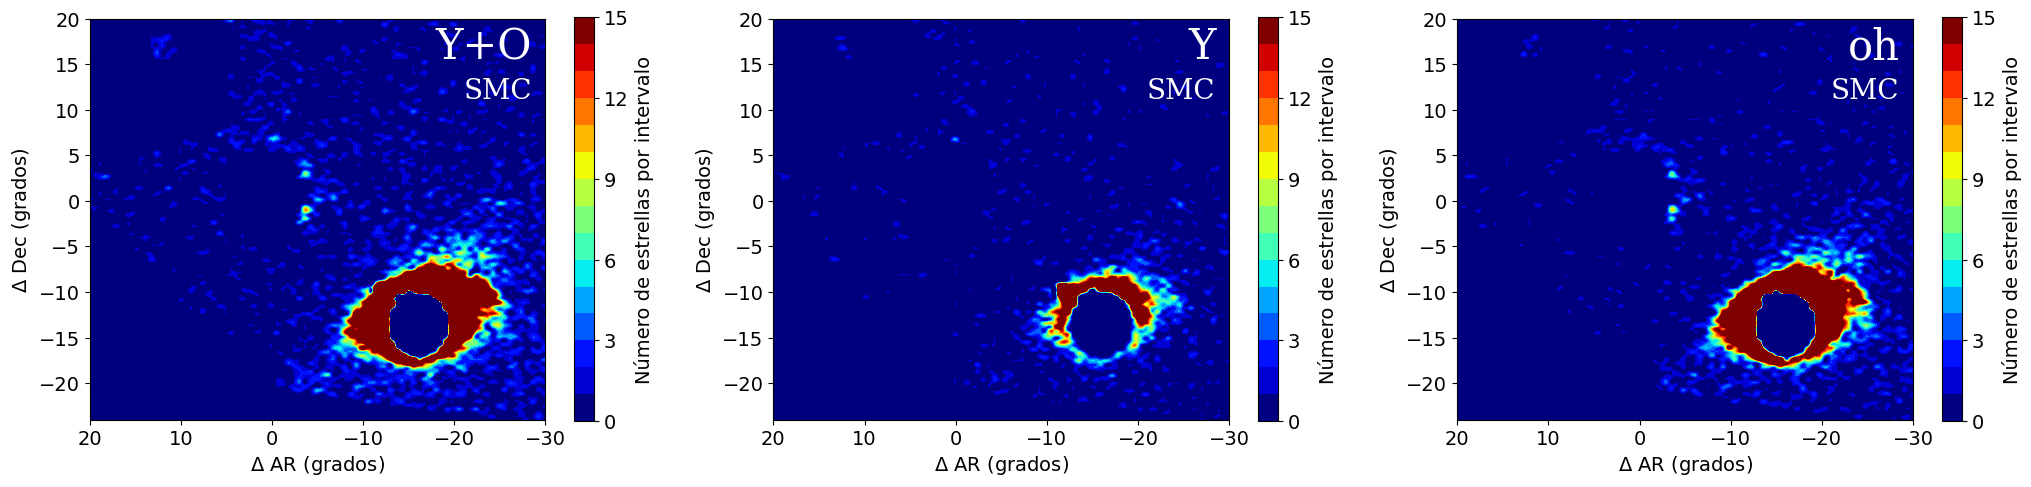

In [21]:
# en cualquiera de las elipses MC PM, pero no en ninguna de las elipses XY
sel_MC = (sel_pm_LMC | sel_pm_SMC) & ~sel_cart_LMC & ~sel_cart_SMC 
sel_YO_MC = (sel_Y | sel_O) & sel_MC
sel_Y_MC = sel_Y & sel_MC
sel_O_MC = sel_O & sel_MC
plot_spatialdensity(res_xmatch[sel_YO_MC]['X'],res_xmatch[sel_YO_MC]['Y'],
                    res_xmatch[sel_Y_MC]['X'],res_xmatch[sel_Y_MC]['Y'],
                    res_xmatch[sel_O_MC]['X'],res_xmatch[sel_O_MC]['Y'],mc='')

# en la elipse LMC PM, pero no en la elipse LMC XY
sel_LMC = sel_pm_LMC & ~sel_cart_LMC
sel_YO_LMC = (sel_Y | sel_O) & sel_LMC
sel_Y_LMC = sel_Y & sel_LMC
sel_O_LMC = sel_O & sel_LMC
plot_spatialdensity(res_xmatch[sel_YO_LMC]['X'],res_xmatch[sel_YO_LMC]['Y'],
                    res_xmatch[sel_Y_LMC]['X'],res_xmatch[sel_Y_LMC]['Y'],
                    res_xmatch[sel_O_LMC]['X'],res_xmatch[sel_O_LMC]['Y'],mc='LMC')

# en la elipse SMC PM, pero no en la elipse SMC XY
sel_SMC = sel_pm_SMC & ~sel_cart_SMC
sel_YO_SMC = (sel_Y | sel_O) & sel_SMC
sel_Y_SMC = sel_Y & sel_SMC
sel_O_SMC = sel_O & sel_SMC
plot_spatialdensity(res_xmatch[sel_YO_SMC]['X'],res_xmatch[sel_YO_SMC]['Y'],
                    res_xmatch[sel_Y_SMC]['X'],res_xmatch[sel_Y_SMC]['Y'],
                    res_xmatch[sel_O_SMC]['X'],res_xmatch[sel_O_SMC]['Y'],mc='SMC')

Mapas morfológicos de estrellas jóvenes y viejas (Y+O; izquierda) que rodean a las MC, estrellas jóvenes (Y; centro) dominadas por estrellas superiores de la secuencia principal y estrellas supergigantes, y estrellas viejas (O; derecha) dominadas por estrellas RGB y RC. Las tres filas muestran estrellas seleccionadas según los movimientos propios de LMC o SMC (arriba), los movimientos propios de LMC (centro) y los movimientos propios de SMC (abajo). Las barras de colores muestran el número de estrellas por intervalo. Las regiones centrales de LMC y SMC han sido enmascaradas para enfatizar la distribución de estrellas en las regiones exteriores.

<a class="anchor" id="gaiadr2"></a>
## Usando Gaia DR3 en lugar de Gaia DR2
Los gráficos y análisis realizados en [El Youssoufi et al. (2021)](https://arxiv.org/abs/2104.08054) utilizaron Gaia DR2 para extraer los valores de paralaje y movimiento propio de las estrellas que rodean las Nubes de Magallanes. En cambio, este portátil utiliza Gaia DR3, que tiene mejor astrometría y mediciones de flujo menos ruidosas para mostrar resultados de mejor calidad.

Compare la imagen a continuación (que usa Gaia DR2 para graficar los mapas de morfología) con la gráfica de arriba (que usa Gaia DR3). Hay una clara mejora en los datos recopilados para LMC y SMC. Particularmente en la fila inferior, que se supone que muestra sólo el SMC, muestra menos huella del LMC.

<figura>
<centro>
<img src="gaiadr2_x_vhsdr5.png", ancho=100%>
</centro>
</figura>

# Recursos y referencias

Interpolaciones para imshow: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html
Bien proporcionado: https://shapely.readthedocs.io/en/stable/manual.html
Proyección equidistante azimutal: https://mathworld.wolfram.com/AzimuthalEquidistantProjection.html

Cioni et al. (2014): https://arxiv.org/abs/1306.4336
Cioni et al. (2016): https://arxiv.org/abs/1510.07647
El Youssoufi et al. (2019): https://arxiv.org/abs/1908.08545
El Youssoufi et al. (2021): https://arxiv.org/abs/2104.08054